### Create a Strategy

- Decide on potential adjustable parameters
- Instantiate the Indicators you need in the Strategy
- Write down the logic for entering/exiting the market

Or Prepare some indicators to work as long/short signals




- Create a Cerebro Engine
  - First: Inject the Strategy (or signal-based strategy)
  
And then:

 - Load and Inject a Data Feed (once created use cerebro.adddata)
 - And execute cerebro.run()
 - For visual feedback use: cerebro.plot()
 
 The platform is highly configurable



## Using the platform

1. Lines

Data Feeds, Indicators and Strategies have lines.

A line is a succession of points that when joined together form this line. When talking about the markets, a Data Feed has usually the following set of points per day:

- Open, High, Low, Close, Volume, Open Interest

The series of “Open”s along time is a Line. And therefore a Data Feed has usually 6 lines.
If we also consider “DateTime” (which is the actual reference for a single point), we could count 7 lines.

2. Index 0 Approach

When accessing the values in a line, the current value is accessed with index: 0

And the “last” output value is accessed with -1. This in line with Python conventions for iterables (and a line can be iterated and is therefore an iterable) where index -1 is used to access the “last” item of the iterable/array.

In our case is the last output value what’s getting accessed.

As such and being index 0 right after -1, it is used to access the current moment in line.

With that in mind and if we imagine a Strategy featuring a Simple Moving average created during initialization:

```
self.sma = SimpleMovingAverage(.....)
```
The easiest and simplest way to access the current value of this moving average:

```
av = self.sma[0]
```

There is no need to know how many bars/minutes/days/months have been processed, because “0” uniquely identifies the current instant.

Following pythonic tradition, the “last” output value is accessed using -1:
```
previous_value = self.sma[-1]
```

In [2]:
from __future__ import (absolute_import, division, print_function,
                        unicode_literals)

import backtrader as bt

if __name__ == '__main__':
    cerebro = bt.Cerebro()  #The Cerebro engine was instantiated

    print('Starting Portfolio Value: %.2f' % cerebro.broker.getvalue())

    cerebro.run()  #The resulting cerebro instance was told to run (loop over data)

    print('Final Portfolio Value: %.2f' % cerebro.broker.getvalue())

Starting Portfolio Value: 10000.00
Final Portfolio Value: 10000.00


### Setting the Cash
In the world of finance, for sure only “losers” start with 10k. Let’s change the cash and run the example again.

In [3]:
import backtrader as bt

if __name__ == '__main__':
    cerebro = bt.Cerebro()
    cerebro.broker.setcash(100000.0)

    print('Starting Portfolio Value: %.2f' % cerebro.broker.getvalue())

    cerebro.run()

    print('Final Portfolio Value: %.2f' % cerebro.broker.getvalue())

Starting Portfolio Value: 100000.00
Final Portfolio Value: 100000.00


### Adding a Data Feed

Having cash is fun, but the purpose behind all this is to let an automated strategy multiply the cash without moving a finger by operating on an asset which we see as a Data Feed

Ergo … No Data Feed -> No Fun. Let’s add one to the ever growing example.

Yahoo Online sends the CSV data in date descending order, which is not the standard convention. The reversed=True prameter takes into account that the CSV data in the file has already been reversed and has the standard expected date ascending order.



In [14]:
import os
dir = os.getcwd()

In [15]:
dir

'I:\\Finance\\2020\\APR'

In [24]:
from __future__ import (absolute_import, division, print_function,
                        unicode_literals)

import datetime  # For datetime objects
import os.path  # To manage paths
import sys  # To find out the script name (in argv[0])

# Import the backtrader platform
import backtrader as bt

if __name__ == '__main__':
    # Create a cerebro entity
    cerebro = bt.Cerebro()

    # Datas are in a subfolder of the samples. Need to find where the script is
    # because it could have been called from anywhere
    modpath = os.path.dirname(os.path.abspath(sys.argv[0]))
    datapath = './SUNPHARMA.NS.csv'

    # Create a Data Feed
    data = bt.feeds.YahooFinanceCSVData(
        dataname=datapath,
        # Do not pass values before this date
        fromdate=datetime.datetime(2020, 4, 13),
        # Do not pass values after this date
        todate=datetime.datetime(2021, 4, 9),
        reverse=False)

    # Add the Data Feed to Cerebro
    cerebro.adddata(data)

    # Set our desired cash start
    cerebro.broker.setcash(100000.0)

    # Print out the starting conditions
    print('Starting Portfolio Value: %.2f' % cerebro.broker.getvalue())

    # Run over everything
    cerebro.run()

    # Print out the final result
    print('Final Portfolio Value: %.2f' % cerebro.broker.getvalue())

Starting Portfolio Value: 100000.00
Final Portfolio Value: 100000.00


### Our First Strategy

The cash is in the broker and the Data Feed is there. It seems like risky business is just around the corner.

Let’s put a Strategy into the equation and print the “Close” price of each day (bar).

DataSeries (the underlying class in Data Feeds) objects have aliases to access the well known OHLC (Open High Low Close) daily values. This should ease up the creation of our printing logic.



In [26]:

import datetime  # For datetime objects
import os.path  # To manage paths
import sys  # To find out the script name (in argv[0])

# Import the backtrader platform
import backtrader as bt


# Create a Stratey
class TestStrategy(bt.Strategy):

    def log(self, txt, dt=None):
        ''' Logging function for this strategy'''
        dt = dt or self.datas[0].datetime.date(0)
        print('%s, %s' % (dt.isoformat(), txt))

    def __init__(self):
        # Keep a reference to the "close" line in the data[0] dataseries
        self.dataclose = self.datas[0].close

    def next(self):
        # Simply log the closing price of the series from the reference
        self.log('Close, %.2f' % self.dataclose[0])


if __name__ == '__main__':
    # Create a cerebro entity
    cerebro = bt.Cerebro()

    # Add a strategy
    cerebro.addstrategy(TestStrategy)

    # Datas are in a subfolder of the samples. Need to find where the script is
    # because it could have been called from anywhere
    datapath = './SUNPHARMA.NS.csv'

    # Create a Data Feed
    data = bt.feeds.YahooFinanceCSVData(
        dataname=datapath,
        # Do not pass values before this date
        fromdate=datetime.datetime(2020, 4, 13),
        # Do not pass values after this date
        todate=datetime.datetime(2021, 4, 9),
        reverse=False)

    # Add the Data Feed to Cerebro
    cerebro.adddata(data)

    # Set our desired cash start
    cerebro.broker.setcash(100000.0)

    # Print out the starting conditions
    print('Starting Portfolio Value: %.2f' % cerebro.broker.getvalue())

    # Run over everything
    cerebro.run()

    # Print out the final result
    print('Final Portfolio Value: %.2f' % cerebro.broker.getvalue())

Starting Portfolio Value: 100000.00
2020-04-13, Close, 457.47
2020-04-15, Close, 444.46
2020-04-16, Close, 458.81
2020-04-17, Close, 452.28
2020-04-20, Close, 468.41
2020-04-21, Close, 468.16
2020-04-22, Close, 469.35
2020-04-23, Close, 472.41
2020-04-24, Close, 480.43
2020-04-27, Close, 484.73
2020-04-28, Close, 468.95
2020-04-29, Close, 472.61
2020-04-30, Close, 459.55
2020-05-04, Close, 460.54
2020-05-05, Close, 451.49
2020-05-06, Close, 449.61
2020-05-07, Close, 447.43
2020-05-08, Close, 464.05
2020-05-11, Close, 458.96
2020-05-12, Close, 459.01
2020-05-13, Close, 447.58
2020-05-14, Close, 451.14
2020-05-15, Close, 443.87
2020-05-18, Close, 436.05
2020-05-19, Close, 437.04
2020-05-20, Close, 450.94
2020-05-21, Close, 461.53
2020-05-22, Close, 464.45
2020-05-26, Close, 454.31
2020-05-27, Close, 446.14
2020-05-28, Close, 454.26
2020-05-29, Close, 469.25
2020-06-01, Close, 460.49
2020-06-02, Close, 468.11
2020-06-03, Close, 471.13
2020-06-04, Close, 489.63
2020-06-05, Close, 489.04
20

Let’s explain some of the magic:

- Upon `init` being called the strategy already has a list of datas that are present in the platform
- This is a standard Python list and datas can be accessed in the order they were inserted.
- The first data in the list self.datas[0] is the default data for trading operations and to keep all strategy elements synchronized (it’s the system clock)
- self.dataclose = self.datas[0].close keeps a reference to the close line. Only one level of indirection is later needed to access the close values.
- The strategy next method will be called on each bar of the system clock (self.datas[0]). This is true until other things come into play like indicators, which need some bars to start producing an output. More on that later.

### Adding some Logic to the Strategy
Let’s try some crazy idea we had by looking at some charts

If the price has been falling 3 sessions in a row … BUY BUY BUY!!!

In [31]:

import datetime  # For datetime objects
import os.path  # To manage paths
import sys  # To find out the script name (in argv[0])

# Import the backtrader platform
import backtrader as bt


# Create a Stratey
class TestStrategy(bt.Strategy):

    def log(self, txt, dt=None):
        ''' Logging function fot this strategy'''
        dt = dt or self.datas[0].datetime.date(0)
        print('%s, %s' % (dt.isoformat(), txt))

    def __init__(self):
        # Keep a reference to the "close" line in the data[0] dataseries
        self.dataclose = self.datas[0].close

    def next(self):
        # Simply log the closing price of the series from the reference
        self.log('Close, %.2f' % self.dataclose[0])

        if self.dataclose[0] < self.dataclose[-1]:
            # current close less than previous close

            if self.dataclose[-1] < self.dataclose[-2]:
                # previous close less than the previous close

                # BUY, BUY, BUY!!! (with all possible default parameters)
                self.log('BUY CREATE, %.2f' % self.dataclose[0])
                self.buy()


if __name__ == '__main__':
    # Create a cerebro entity
    cerebro = bt.Cerebro()

    # Add a strategy
    cerebro.addstrategy(TestStrategy)

    # Datas are in a subfolder of the samples. Need to find where the script is
    # because it could have been called from anywhere
    modpath = os.path.dirname(os.path.abspath(sys.argv[0]))
    datapath = os.path.join(modpath, '../../datas/orcl-1995-2014.txt')

    # Datas are in a subfolder of the samples. Need to find where the script is
    # because it could have been called from anywhere
    datapath = './SUNPHARMA.NS.csv'

    # Create a Data Feed
    data = bt.feeds.YahooFinanceCSVData(
        dataname=datapath,
        # Do not pass values before this date
        fromdate=datetime.datetime(2020, 4, 13),
        # Do not pass values after this date
        todate=datetime.datetime(2021, 4, 9),
        reverse=False)

    # Add the Data Feed to Cerebro
    cerebro.adddata(data)


    # Set our desired cash start
    cerebro.broker.setcash(100000.0)

    # Print out the starting conditions
    print('Starting Portfolio Value: %.2f' % cerebro.broker.getvalue())

    # Run over everything
    cerebro.run()

    # Print out the final result
    print('Final Portfolio Value: %.2f' % cerebro.broker.getvalue())

Starting Portfolio Value: 100000.00
2020-04-13, Close, 457.47
2020-04-13, BUY CREATE, 457.47
2020-04-15, Close, 444.46
2020-04-15, BUY CREATE, 444.46
2020-04-16, Close, 458.81
2020-04-17, Close, 452.28
2020-04-20, Close, 468.41
2020-04-21, Close, 468.16
2020-04-22, Close, 469.35
2020-04-23, Close, 472.41
2020-04-24, Close, 480.43
2020-04-27, Close, 484.73
2020-04-28, Close, 468.95
2020-04-29, Close, 472.61
2020-04-30, Close, 459.55
2020-05-04, Close, 460.54
2020-05-05, Close, 451.49
2020-05-06, Close, 449.61
2020-05-06, BUY CREATE, 449.61
2020-05-07, Close, 447.43
2020-05-07, BUY CREATE, 447.43
2020-05-08, Close, 464.05
2020-05-11, Close, 458.96
2020-05-12, Close, 459.01
2020-05-13, Close, 447.58
2020-05-14, Close, 451.14
2020-05-15, Close, 443.87
2020-05-18, Close, 436.05
2020-05-18, BUY CREATE, 436.05
2020-05-19, Close, 437.04
2020-05-20, Close, 450.94
2020-05-21, Close, 461.53
2020-05-22, Close, 464.45
2020-05-26, Close, 454.31
2020-05-27, Close, 446.14
2020-05-27, BUY CREATE, 446.1

Several “BUY” creation orders were issued, our porftolio value was decremented. A couple of important things are clearly missing.

 - The order was created but it is unknown if it was executed, when and at what price.

The next example will build upon that by listening to notifications of order status.

The curious reader may ask how many shares are being bought, what asset is being bought and how are orders being executed. Where possible (and in this case it is) the platform fills in the gaps:

 - self.datas[0] (the main data aka system clock) is the target asset if no other one is specified
 - The stake is provided behind the scenes by a position sizer which uses a fixed stake, being the default “1”. It will be modified in a later example
 - The order is executed “At Market”. The broker (shown in previous examples) executes this using the opening price of the next bar, because that’s the 1st tick after the current under examination bar.
 - The order is executed so far without any commission (more on that later)



### Do not only buy … but SELL
After knowing how to enter the market (long), an “exit concept” is needed and also understanding whether the strategy is in the market.

- Luckily a Strategy object offers access to a position attribute for the default data feed
- Methods buy and sell return the created (not yet executed) order
- Changes in orders’ status will be notified to the strategy via a notify method


The “exit concept” will be an easy one:

- Exit after 5 bars (on the 6th bar) have elapsed for good or for worse

Please notice that there is no “time” or “timeframe” implied: number of bars. The bars can represent 1 minute, 1 hour, 1 day, 1 week or any other time period.

Although we know the data source is a daily one, the strategy makes no assumption about that.

- Do only allow a Buy order if not yet in the market

In [34]:


# Create a Stratey
class TestStrategy(bt.Strategy):

    def log(self, txt, dt=None):
        ''' Logging function fot this strategy'''
        dt = dt or self.datas[0].datetime.date(0)
        print('%s, %s' % (dt.isoformat(), txt))

    def __init__(self):
        # Keep a reference to the "close" line in the data[0] dataseries
        self.dataclose = self.datas[0].close

        # To keep track of pending orders
        self.order = None

    def notify_order(self, order):
        if order.status in [order.Submitted, order.Accepted]:
            # Buy/Sell order submitted/accepted to/by broker - Nothing to do
            return

        # Check if an order has been completed
        # Attention: broker could reject order if not enough cash
        if order.status in [order.Completed]:
            if order.isbuy():
                self.log('BUY EXECUTED, %.2f' % order.executed.price)
            elif order.issell():
                self.log('SELL EXECUTED, %.2f' % order.executed.price)

            self.bar_executed = len(self)

        elif order.status in [order.Canceled, order.Margin, order.Rejected]:
            self.log('Order Canceled/Margin/Rejected')

        # Write down: no pending order
        self.order = None

    def next(self):
        # Simply log the closing price of the series from the reference
        self.log('Close, %.2f' % self.dataclose[0])

        # Check if an order is pending ... if yes, we cannot send a 2nd one
        if self.order:
            return

        # Check if we are in the market
        if not self.position:

            # Not yet ... we MIGHT BUY if ...
            if self.dataclose[0] < self.dataclose[-1]:
                    # current close less than previous close

                    if self.dataclose[-1] < self.dataclose[-2]:
                        # previous close less than the previous close

                        # BUY, BUY, BUY!!! (with default parameters)
                        self.log('BUY CREATE, %.2f' % self.dataclose[0])

                        # Keep track of the created order to avoid a 2nd order
                        self.order = self.buy()

        else:

            # Already in the market ... we might sell
            if len(self) >= (self.bar_executed + 5):
                # SELL, SELL, SELL!!! (with all possible default parameters)
                self.log('SELL CREATE, %.2f' % self.dataclose[0])

                # Keep track of the created order to avoid a 2nd order
                self.order = self.sell()

                
if __name__ == '__main__':
    # Create a cerebro entity
    cerebro = bt.Cerebro()

    # Add a strategy
    cerebro.addstrategy(TestStrategy)

    # Datas are in a subfolder of the samples. Need to find where the script is
    # because it could have been called from anywhere

    # Datas are in a subfolder of the samples. Need to find where the script is
    # because it could have been called from anywhere
    datapath = './SUNPHARMA.NS.csv'

    # Create a Data Feed
    data = bt.feeds.YahooFinanceCSVData(
        dataname=datapath,
        # Do not pass values before this date
        fromdate=datetime.datetime(2020, 4, 13),
        # Do not pass values after this date
        todate=datetime.datetime(2021, 4, 9),
        reverse=False)

    # Add the Data Feed to Cerebro
    cerebro.adddata(data)


    # Set our desired cash start
    cerebro.broker.setcash(100000.0)

    # Print out the starting conditions
    print('Starting Portfolio Value: %.2f' % cerebro.broker.getvalue())

    # Run over everything
    cerebro.run()

    # Print out the final result
    print('Final Portfolio Value: %.2f' % cerebro.broker.getvalue())


Starting Portfolio Value: 100000.00
2020-04-13, Close, 457.47
2020-04-13, BUY CREATE, 457.47
2020-04-15, BUY EXECUTED, 469.89
2020-04-15, Close, 444.46
2020-04-16, Close, 458.81
2020-04-17, Close, 452.28
2020-04-20, Close, 468.41
2020-04-21, Close, 468.16
2020-04-22, Close, 469.35
2020-04-22, SELL CREATE, 469.35
2020-04-23, SELL EXECUTED, 471.92
2020-04-23, Close, 472.41
2020-04-24, Close, 480.43
2020-04-27, Close, 484.73
2020-04-28, Close, 468.95
2020-04-29, Close, 472.61
2020-04-30, Close, 459.55
2020-05-04, Close, 460.54
2020-05-05, Close, 451.49
2020-05-06, Close, 449.61
2020-05-06, BUY CREATE, 449.61
2020-05-07, BUY EXECUTED, 457.13
2020-05-07, Close, 447.43
2020-05-08, Close, 464.05
2020-05-11, Close, 458.96
2020-05-12, Close, 459.01
2020-05-13, Close, 447.58
2020-05-14, Close, 451.14
2020-05-14, SELL CREATE, 451.14
2020-05-15, SELL EXECUTED, 451.14
2020-05-15, Close, 443.87
2020-05-18, Close, 436.05
2020-05-18, BUY CREATE, 436.05
2020-05-19, BUY EXECUTED, 439.12
2020-05-19, Clos

### The broker says: Show me the money!
And the money is called “commission”.

Let’s add a reasonable 0.1% commision rate per operation (both for buying and selling … yes the broker is avid …)

A single line will suffice for it:


In [35]:
# 0.1% ... divide by 100 to remove the %
cerebro.broker.setcommission(commission=0.001)


In [36]:

if __name__ == '__main__':
    # Create a cerebro entity
    cerebro = bt.Cerebro()

    # Add a strategy
    cerebro.addstrategy(TestStrategy)

    # Datas are in a subfolder of the samples. Need to find where the script is
    # because it could have been called from anywhere
    modpath = os.path.dirname(os.path.abspath(sys.argv[0]))
    datapath = os.path.join(modpath, '../../datas/orcl-1995-2014.txt')

    # Datas are in a subfolder of the samples. Need to find where the script is
    # because it could have been called from anywhere
    datapath = './SUNPHARMA.NS.csv'

    # Create a Data Feed
    data = bt.feeds.YahooFinanceCSVData(
        dataname=datapath,
        # Do not pass values before this date
        fromdate=datetime.datetime(2020, 4, 13),
        # Do not pass values after this date
        todate=datetime.datetime(2021, 4, 9),
        reverse=False)

    # Add the Data Feed to Cerebro
    cerebro.adddata(data)
    # Set our desired cash start
    cerebro.broker.setcash(100000.0)

    # Set the commission - 0.1% ... divide by 100 to remove the %
    cerebro.broker.setcommission(commission=0.001)

    # Print out the starting conditions
    print('Starting Portfolio Value: %.2f' % cerebro.broker.getvalue())

    # Run over everything
    cerebro.run()

    # Print out the final result
    print('Final Portfolio Value: %.2f' % cerebro.broker.getvalue())

Starting Portfolio Value: 100000.00
2020-04-13, Close, 457.47
2020-04-13, BUY CREATE, 457.47
2020-04-15, BUY EXECUTED, 469.89
2020-04-15, Close, 444.46
2020-04-16, Close, 458.81
2020-04-17, Close, 452.28
2020-04-20, Close, 468.41
2020-04-21, Close, 468.16
2020-04-22, Close, 469.35
2020-04-22, SELL CREATE, 469.35
2020-04-23, SELL EXECUTED, 471.92
2020-04-23, Close, 472.41
2020-04-24, Close, 480.43
2020-04-27, Close, 484.73
2020-04-28, Close, 468.95
2020-04-29, Close, 472.61
2020-04-30, Close, 459.55
2020-05-04, Close, 460.54
2020-05-05, Close, 451.49
2020-05-06, Close, 449.61
2020-05-06, BUY CREATE, 449.61
2020-05-07, BUY EXECUTED, 457.13
2020-05-07, Close, 447.43
2020-05-08, Close, 464.05
2020-05-11, Close, 458.96
2020-05-12, Close, 459.01
2020-05-13, Close, 447.58
2020-05-14, Close, 451.14
2020-05-14, SELL CREATE, 451.14
2020-05-15, SELL EXECUTED, 451.14
2020-05-15, Close, 443.87
2020-05-18, Close, 436.05
2020-05-18, BUY CREATE, 436.05
2020-05-19, BUY EXECUTED, 439.12
2020-05-19, Clos

Final Portfolio Value: 100026.31


### Customizing the Strategy: Parameters
It would a bit unpractical to hardcode some of the values in the strategy and have no chance to change them easily. Parameters come in handy to help.

Definition of parameters is easy and looks like:


params = (('myparam', 27), ('exitbars', 5),)
Being this a standard Python tuple with some tuples inside it, the following may look more appealling to some:


params = (
    ('myparam', 27),
    ('exitbars', 5),
)
With either formatting parametrization of the strategy is allowed when adding the strategy to the Cerebro engine:


### Add a strategy
cerebro.addstrategy(TestStrategy, myparam=20, exitbars=7)

-----------------

The setsizing method below is deprecated. This content is kept here for anyone looking at old samples of the sources. The sources have been update to use:


cerebro.addsizer(bt.sizers.FixedSize, stake=10)``
Please read the section about sizers

Using the parameters in the strategy is easy, as they are stored in a “params” attribute. If we for example want to set the stake fix, we can pass the stake parameter to the position sizer like this durint init:


### Set the sizer stake from the params
self.sizer.setsizing(self.params.stake)


<IPython.core.display.Javascript object>


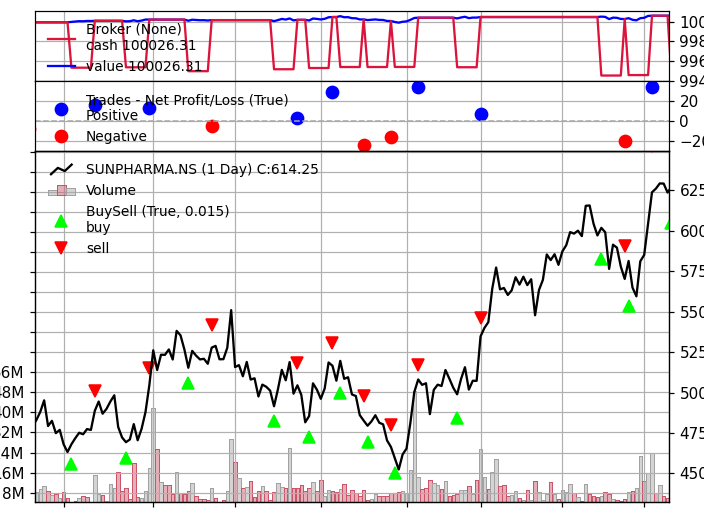

[[<Figure size 640x480 with 4 Axes>]]

In [40]:
bt.indicators.ExponentialMovingAverage(data[0], period=25)
cerebro.plot()
